In [2]:
# Vectorized String Operations 处理string data

import numpy as np
import pandas as pd

x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [3]:
x

array([ 2,  3,  5,  7, 11, 13])

In [4]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [5]:
X = list()
for x in data:
    X.append(x.capitalize())
print(X)

['Peter', 'Paul', 'Mary', 'Guido']


In [6]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']

data1 = [x for x in data if x != None]


[s.capitalize() for s in data1]

['Peter', 'Paul', 'Mary', 'Guido']

In [7]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [8]:
names.str.casefold()

0    peter
1     paul
2     None
3     mary
4    guido
dtype: object

In [9]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [10]:

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])


monte1 = pd.Series([ a.capitalize() for a in monte if a!= 'John Cleese'])

print(monte)
print(monte1)

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object
0    Graham chapman
1     Terry gilliam
2         Eric idle
3       Terry jones
4     Michael palin
dtype: object


In [11]:
monte1.str.lower()

0    graham chapman
1     terry gilliam
2         eric idle
3       terry jones
4     michael palin
dtype: object

In [12]:
# len() lower() translate() islower()
# ljust() upper() startswith() isupper()
# rjust() find() endswith() isnumeric()
# center() rfind() isalnum() isdecimal()
# zfill() index() isalpha() split()
# strip() rindex() isdigit() rsplit()
# rstrip() capitalize() isspace() partition()
# lstrip() swapcase() istitle() rpartition()
# 有关str的df有一整套func，略

In [13]:
# Working with Time Series

# page 190 
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [14]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [15]:
date.strftime('%A')

'Saturday'

In [16]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [17]:
from pandas_datareader import data


goog = data.DataReader("GOOG", 'yahoo', start='2004', end='2016')


goog.head()





,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


<AxesSubplot:xlabel='Date'>

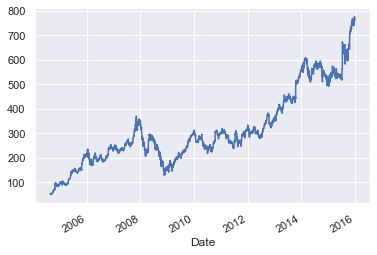

In [18]:
goog = goog['Close']

import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()
goog.plot()


<AxesSubplot:xlabel='Date'>

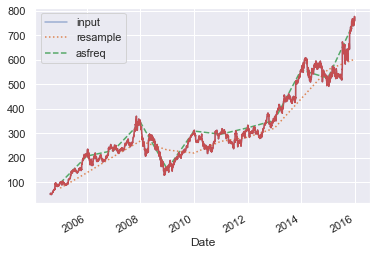

In [19]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
loc='upper left');

goog.plot()

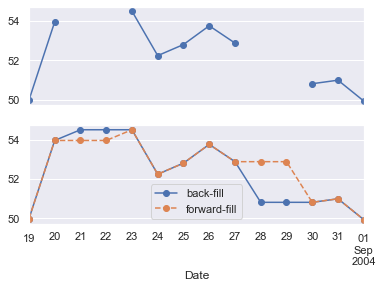

In [20]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

<ipython-input-21-86372dc5f962>:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


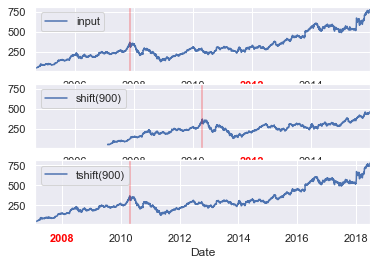

In [21]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<ipython-input-22-500c6c126989>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


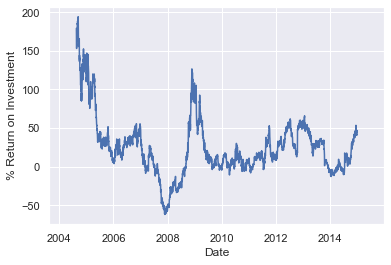

In [22]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

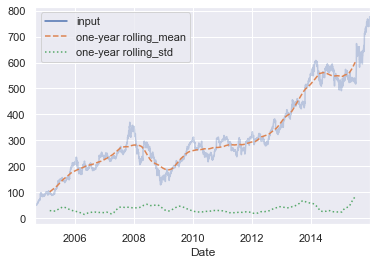

In [23]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [24]:
# Example: Visualizing Seattle Bicycle Counts

!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4472k    0 4472k    0     0  1011k      0 --:--:--  0:00:04 --:--:-- 1104k


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [25]:

data1 = pd.DataFrame(data)
data1.columns = ['Total', 'West', 'East']
print(data1.head())
print(type(data1))



                     Total  West  East
Date                                  
2019-11-01 00:00:00   12.0   7.0   5.0
2019-11-01 01:00:00    7.0   0.0   7.0
2019-11-01 02:00:00    1.0   0.0   1.0
2019-11-01 03:00:00    6.0   6.0   0.0
2019-11-01 04:00:00    6.0   5.0   1.0
<class 'pandas.core.frame.DataFrame'>


In [26]:
data1['Total1'] = data.eval('West + East')

data1['New']= data['West']+ data1['East']
print(data1)

                     Total  West  East  Total1    New
Date                                                 
2019-11-01 00:00:00   12.0   7.0   5.0    12.0   12.0
2019-11-01 01:00:00    7.0   0.0   7.0     7.0    7.0
2019-11-01 02:00:00    1.0   0.0   1.0     1.0    1.0
2019-11-01 03:00:00    6.0   6.0   0.0     6.0    6.0
2019-11-01 04:00:00    6.0   5.0   1.0     6.0    6.0
...                    ...   ...   ...     ...    ...
2021-07-31 19:00:00  129.0  34.0  95.0   129.0  129.0
2021-07-31 20:00:00   69.0  32.0  37.0    69.0   69.0
2021-07-31 21:00:00   70.0  17.0  53.0    70.0   70.0
2021-07-31 22:00:00   49.0  16.0  33.0    49.0   49.0
2021-07-31 23:00:00   30.0   7.0  23.0    30.0   30.0

[143630 rows x 5 columns]


In [27]:
data.dropna().describe()

,Total,West,East,Total1,New
count,143608.000000,143608.000000,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119,111.162735,111.162735
std,141.443433,65.157096,87.921215,141.443433,141.443433
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000,14.000000,14.000000
50%,60.000000,28.000000,30.000000,60.000000,60.000000
75%,146.000000,68.000000,74.000000,146.000000,146.000000
max,1097.000000,698.000000,850.000000,1097.000000,1097.000000


In [28]:
# Visualizing the data
%matplotlib inline
import seaborn; seaborn.set()


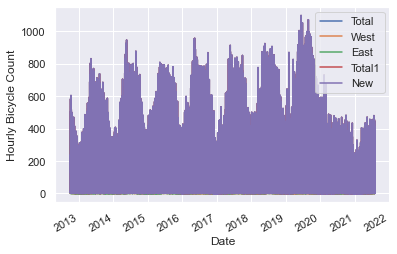

In [29]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

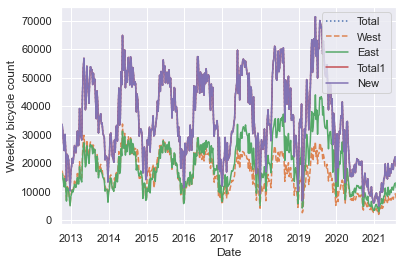

In [30]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

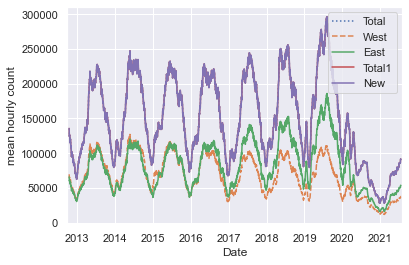

In [31]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

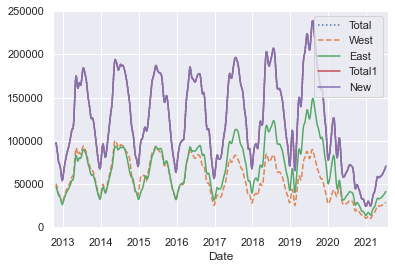

In [32]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

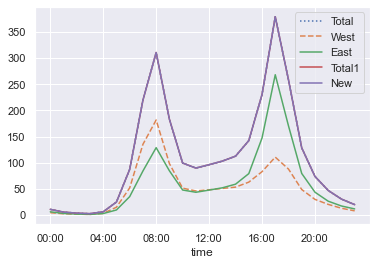

In [33]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

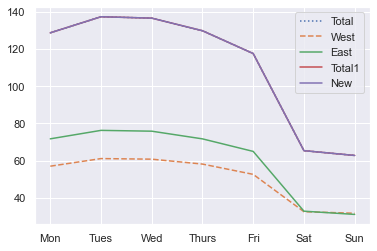

In [34]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [35]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [36]:
# High-Performance Pandas: eval() and query()

In [37]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

420 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

161 ms ± 4.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
# pandas.eval() for Efficient Operations
# pd.eval(a + b)

# page 210

import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))

print(df1, df2, df3, df4)


             0         1         2         3         4         5         6   \
0      0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   
1      0.031429  0.636410  0.314356  0.508571  0.907566  0.249292  0.410383   
2      0.642032  0.084140  0.161629  0.898554  0.606429  0.009197  0.101472   
3      0.051682  0.531355  0.540635  0.637430  0.726091  0.975852  0.516300   
4      0.103124  0.902553  0.505252  0.826457  0.320050  0.895523  0.389202   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.071979  0.439323  0.188588  0.586705  0.640611  0.662409  0.318503   
99996  0.313411  0.010490  0.469216  0.600825  0.451085  0.496918  0.983128   
99997  0.560873  0.647396  0.043068  0.282439  0.042950  0.346690  0.954034   
99998  0.710115  0.067999  0.611329  0.136199  0.054724  0.018160  0.911428   
99999  0.116834  0.461155  0.754556  0.250272  0.864631  0.588966  0.358260   

             7         8         9   ...        90 

In [40]:
%timeit df1+df2+df3+df4

20.2 ms ± 713 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
%timeit pd.eval('df1+df2+df3+df4')

10.6 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
np.allclose(df1+df2+df3+df4, pd.eval('df1+df2+df3+df4')) 
# 测试是否两个操作得到同样的结果

True

In [43]:
# Operations supported by pd.eval()
# 一些支持 eval() 的操作
new1 =  pd.eval('df1+df2+df3+df4')

In [44]:
print(new1.head())

         0         1         2         3         4         5         6   \
0  2.456085  2.240325  2.189299  2.796486  0.997756  1.857199  0.836188   
1  1.930732  1.325833  2.100320  1.031509  2.216550  2.322945  2.221711   
2  2.961585  1.241173  1.292687  1.559529  3.244460  1.727601  1.508593   
3  1.325278  2.311100  3.153195  2.428513  2.468706  2.168389  1.036675   
4  1.107165  1.998018  2.171741  3.011473  2.403474  1.785172  1.148053   

         7         8         9   ...        90        91        92        93  \
0  1.993636  3.384643  1.851474  ...  1.405156  1.972001  3.018147  2.220360   
1  2.551356  1.446013  1.150052  ...  1.295991  1.298014  2.191522  1.514702   
2  2.373529  1.092988  1.932929  ...  1.857067  2.436111  2.279347  2.240607   
3  2.543273  1.985104  1.664177  ...  2.248197  2.597650  1.624677  1.896175   
4  0.842213  3.165272  1.333032  ...  2.001123  2.899136  1.595563  2.134547   

         94        95        96        97        98        99  
0  3

In [45]:
# DataFrame.eval() for Column-Wise Operations 用dataframe.eval() 来操作数列
df = pd.DataFrame(rng.rand(1000,3), columns= ['A','B','C'])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [46]:
pd.DataFrame(rng.rand(1000,3), columns=['A','B','C']).dropna().describe().head()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,0.505098,0.487818,0.493934
std,0.287831,0.284002,0.287839
min,0.000850,0.001616,0.001049
25%,0.252552,0.249096,0.246676


In [47]:
results1= ((df['A']+ df['B']) / (df['C']-1))
results2 = pd.eval("(df.A+df.B)/(df.C -1)")

results3 = df.eval('(A+B)/(C-1)')


np.allclose(results3,results2, results1)

print(results1.head())

0   -1.197761
1   -1.331822
2   -1.621667
3   -6.688481
4   -1.270064
dtype: float64


In [48]:
# Assignment in DataFrame.eval()

df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [49]:
df.eval('D= (A-B)/C', inplace= True)
df.head()


,A,B,C,D
0,0.615875,0.525167,0.047354,1.915527
1,0.330858,0.412879,0.441564,-0.185752
2,0.689047,0.559068,0.230350,0.564268
3,0.290486,0.695479,0.852587,-0.475016
4,0.424280,0.534344,0.245216,-0.448844


In [50]:
df.eval('xxx = (A+B)/(C-1)', inplace= True)
print(df.head())


          A         B         C         D       xxx
0  0.615875  0.525167  0.047354  1.915527 -1.197761
1  0.330858  0.412879  0.441564 -0.185752 -1.331822
2  0.689047  0.559068  0.230350  0.564268 -1.621667
3  0.290486  0.695479  0.852587 -0.475016 -6.688481
4  0.424280  0.534344  0.245216 -0.448844 -1.270064


In [51]:
column_mean = df.mean(axis= 1);
result1 = df['A'] + column_mean;
result2 = df.eval('A + @column_mean'); # The @ character here marks a variable name rather than a column name,
np.allclose(result1, result2)

True

In [52]:
# DataFrame.query() Method
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [53]:
print(results1)

0     -1.197761
1     -1.331822
2     -1.621667
3     -6.688481
4     -1.270064
         ...   
995   -3.349773
996   -2.163240
997   -0.936554
998   -2.263292
999   -3.781258
Length: 1000, dtype: float64


In [57]:

results2 = df.query('A<0.5 and B < 0.5')
print(results2)

            A         B         C         D        xxx
1    0.330858  0.412879  0.441564 -0.185752  -1.331822
8    0.448611  0.415924  0.481001  0.067958  -1.665774
10   0.112910  0.394884  0.950129 -0.296774 -10.182075
11   0.191011  0.118751  0.130223  0.554895  -0.356140
14   0.075723  0.260648  0.956146 -0.193407  -7.670347
..        ...       ...       ...       ...        ...
964  0.478935  0.196736  0.913372  0.308964  -7.799673
967  0.498382  0.465993  0.664128  0.048768  -2.871262
980  0.150918  0.382386  0.305427 -0.757852  -0.767815
982  0.207822  0.356162  0.653230 -0.227087  -1.626391
997  0.047455  0.450104  0.468734 -0.859015  -0.936554

[257 rows x 5 columns]


In [58]:
np.allclose(result1, result2)

True

In [69]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
result3 = df.eval('A < @Cmean and B < @Cmean') # 当有 < > 操作时，eval会生成一个logic operation，并输出True False，而不是我们要的截取数值，所以我们需要转而采用df.query()
np.allclose(result1, result2)
# np.allclose(result2, result3)

True

In [71]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]
print(x.head())

           A         B         C         D        xxx
1   0.330858  0.412879  0.441564 -0.185752  -1.331822
8   0.448611  0.415924  0.481001  0.067958  -1.665774
10  0.112910  0.394884  0.950129 -0.296774 -10.182075
11  0.191011  0.118751  0.130223  0.554895  -0.356140
14  0.075723  0.260648  0.956146 -0.193407  -7.670347
